In [1]:
from pydataset import data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = data('swiss')

In [3]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [4]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [5]:
df['is_catholic'] = df.Catholic.apply(lambda x: 1 if x > 50 else 0)

In [6]:
df.drop(columns='Catholic', inplace=True)

In [7]:
X = df.drop(['is_catholic'], axis=1)
y = df[['is_catholic']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
import graphviz

from graphviz import Graph

In [9]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)
clf.fit(X_train[['Education', 'Fertility']], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [10]:
def get_confusion_metrics(cnf):
    FP = cnf.sum(axis=0) - np.diag(cnf)  
    FN = (cnf.sum(axis=1)) - np.diag(cnf)
    TP = np.diag(cnf)
    TN = cnf.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print(f'Recall: {TPR}')
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print(f'True Negative Rate: {TNR}')
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print(f'Precision: {PPV}')
    # Negative predictive value
    NPV = TN/(TN+FN)
    print(f'Negative Predictive Value: {NPV}')
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print(f'False positive Rate: {FPR}')
    # False negative rate
    FNR = FN/(TP+FN)
    print(f'False Negative Rate: {FNR}')
    # False discovery rate
    FDR = FP/(TP+FP)
    print(f'False Discovery Rate: {FDR}')
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print(f'Overall Accuracy: {ACC}')

In [11]:
y_pred = clf.predict(X_train[['Education', 'Fertility']])

In [12]:
y_pred_proba = clf.predict_proba(X_train[['Education', 'Fertility']])

In [13]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train[['Education', 'Fertility']], y_train)))

Accuracy of Decision Tree classifier on training set: 0.89


In [14]:
cnf1 = confusion_matrix(y_train, y_pred)

In [15]:
get_confusion_metrics(cnf1)

Recall: [0.95238095 0.8125    ]
True Negative Rate: [0.8125     0.95238095]
Precision: [0.86956522 0.92857143]
Negative Predictive Value: [0.92857143 0.86956522]
False positive Rate: [0.1875     0.04761905]
False Negative Rate: [0.04761905 0.1875    ]
False Discovery Rate: [0.13043478 0.07142857]
Overall Accuracy: [0.89189189 0.89189189]


Fit a logistic regression model using Agriculture and Examination. Measure the model's performance.

In [16]:
logit = LogisticRegression()
logit.fit(X_train[['Agriculture', 'Examination']], y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = logit.predict(X_train[['Agriculture', 'Examination']])
y_pred_proba = logit.predict_proba(X_train[['Agriculture', 'Examination']])

In [18]:
logit.score(X_train[['Agriculture', 'Examination']], y_train)

0.8378378378378378

In [19]:
cnf1 = confusion_matrix(y_train, y_pred)

In [20]:
xget_confusion_metrics(cnf1)

Recall: [0.85714286 0.8125    ]
True Negative Rate: [0.8125     0.85714286]
Precision: [0.85714286 0.8125    ]
Negative Predictive Value: [0.8125     0.85714286]
False positive Rate: [0.1875     0.14285714]
False Negative Rate: [0.14285714 0.1875    ]
False Discovery Rate: [0.14285714 0.1875    ]
Overall Accuracy: [0.83783784 0.83783784]


Fit a K Nearest Neighbors model using two features of your choice. Measure the model's performance.

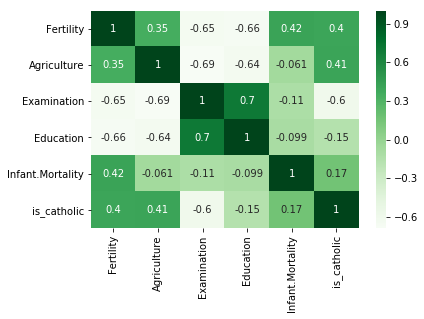

In [21]:
sns.heatmap(data=df.corr(), annot=True, cmap='Greens')

agriculture seems to have the highest correlation with catholocism, seconded by infant moratality.

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train[['Agriculture', 'Infant.Mortality']], y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred = knn.predict(X_train[['Agriculture', 'Infant.Mortality']])
y_pred_proba = knn.predict_proba(X_train[['Agriculture', 'Infant.Mortality']])

In [24]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train[['Agriculture', 'Infant.Mortality']], y_train)))

Accuracy of KNN classifier on training set: 0.68


In [25]:
cnf1 = confusion_matrix(y_train, y_pred)

In [26]:
get_confusion_metrics(cnf1)

Recall: [0.80952381 0.5       ]
True Negative Rate: [0.5        0.80952381]
Precision: [0.68       0.66666667]
Negative Predictive Value: [0.66666667 0.68      ]
False positive Rate: [0.5        0.19047619]
False Negative Rate: [0.19047619 0.5       ]
False Discovery Rate: [0.32       0.33333333]
Overall Accuracy: [0.67567568 0.67567568]


In [27]:
# Just Agriculture this time:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train[['Agriculture']], y_train)
y_pred = knn.predict(X_train[['Agriculture']])
y_pred_proba = knn.predict_proba(X_train[['Agriculture']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train[['Agriculture']], y_train)))

Accuracy of KNN classifier on training set: 0.68


Looks like our first decision tree model is the strongest of the three, we will use it on the test data.

In [29]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)
clf.fit(X_train[['Education', 'Fertility']], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [31]:
y_pred_test = clf.predict(X_test[['Education', 'Fertility']])

In [32]:
y_pred_proba_test = clf.predict_proba(X_test[['Education', 'Fertility']])

In [33]:
print('Accuracy of Decision Tree on test set: {:.2f}'
     .format(clf.score(X_test[['Agriculture', 'Infant.Mortality']], y_test)))

Accuracy of Decision Tree on test set: 0.70


In [34]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train[['Agriculture', 'Infant.Mortality']], y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
y_pred_test = knn.predict(X_test[['Agriculture', 'Infant.Mortality']])
y_pred_proba_test = knn.predict_proba(X_test[['Agriculture', 'Infant.Mortality']])

In [36]:
print('Accuracy of knn on test set: {:.2f}'
     .format(knn.score(X_test[['Agriculture', 'Infant.Mortality']], y_test)))

Accuracy of knn on test set: 0.90
